In [1]:
import spot
spot.setup()

Let's build a small automaton to use as example.

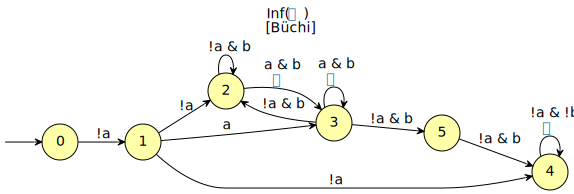

In [2]:
aut = spot.translate('!a & G(Fa <-> XXb)'); aut

Build an accepting run:

In [3]:
run = aut.accepting_run()
print(run)

Prefix:
  0
  |  !a
  1
  |  !a
Cycle:
  2
  |  a & b	{0}
  3
  |  !a & b



Accessing the contents of the run can be done via the `prefix` and `cycle` lists.

In [4]:
print(spot.bdd_format_formula(aut.get_dict(), run.prefix[0].label))
print(run.cycle[0].acc)

!a
{0}


To convert the run into a word, using `spot.twa_word()`.  Note that our runs are labeled by Boolean formulas that are not necessarily a conjunction of all involved literals.   The word is just the projection of the run on its labels.

In [5]:
word = spot.twa_word(run)
print(word)           # print as a string
word                  # LaTeX-style representation in notebooks

!a; !a; cycle{a & b; !a & b}


<spot.twa_word; proxy of <Swig Object of type 'std::shared_ptr< spot::twa_word > *' at 0x7f1f805686f0> >

A word can be represented as a collection of signals (one for each atomic proposition).  The cycle part is shown twice.

In [6]:
word.show()

Accessing the different formulas (stored as BDDs) can be done again via the `prefix` and `cycle` lists.

In [7]:
print(spot.bdd_format_formula(aut.get_dict(), word.prefix[0]))
print(spot.bdd_format_formula(aut.get_dict(), word.prefix[1]))
print(spot.bdd_format_formula(aut.get_dict(), word.cycle[0]))
print(spot.bdd_format_formula(aut.get_dict(), word.cycle[1]))

!a
!a
a & b
!a & b


Calling `simplify()` will produce a shorter word that is compatible with the original word. For instance, in the above word the second `a` is compatible with `!a & b`, so the prefix can be shortened by rotating the cycle.

In [8]:
word.simplify()
print(word)

!a; cycle{!a & b; a & b}


Such a simplified word can be created directly from the automaton:

In [9]:
aut.accepting_word()

<spot.twa_word; proxy of <Swig Object of type 'std::shared_ptr< spot::twa_word > *' at 0x7f1f8060d770> >

Words can be created using the `parse_word` function:

In [10]:
print(spot.parse_word('a; b; cycle{a&b}'))
print(spot.parse_word('cycle{a&bb|bac&(aaa|bbb)}'))
print(spot.parse_word('a; b;b; qiwuei;"a;b&c;a" ;cycle{a}'))

a; b; cycle{a & b}
cycle{(a & bb) | (aaa & bac) | (bac & bbb)}
a; b; b; qiwuei; "a;b&c;a"; cycle{a}


In [11]:
# make sure that we can parse a word back after it has been printed
w = spot.parse_word(str(spot.parse_word('a;b&a;cycle{!a&!b;!a&b}'))); w

<spot.twa_word; proxy of <Swig Object of type 'std::shared_ptr< spot::twa_word > *' at 0x7f1f8060df80> >

In [12]:
w.show()

Words can be easily converted to automata

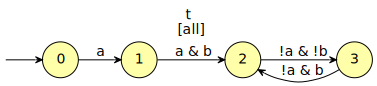

In [13]:
w.as_automaton()

To check if a word is accepted by an automaton, you can use `intersects`.   The name `intersects` actually makes more sense than `accepts` or `accepted`, because a word actually describes a set of words because of the don't care atomic propositions.

In [16]:
print(w.intersects(aut))
print(aut.intersects(w))
print(word.intersects(aut))
print(aut.intersects(word))

False
False
True
True
